<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/latihan_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/indrap23/PJJDA/refs/heads/main/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

1. age
2. sex (1 = male; 0 = female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.




In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


In [8]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

target
1    0.515854
0    0.484146
Name: proportion, dtype: float64
target
1    0.502439
0    0.497561
Name: proportion, dtype: float64


EDA

In [9]:
#gabungkan data untuk keperluan EDA
df_train = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)

In [10]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

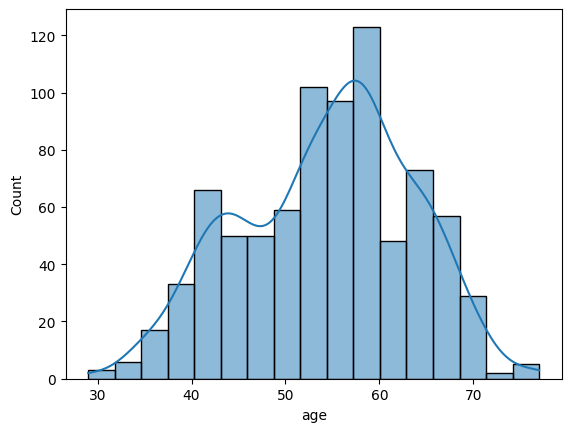

In [14]:
#age
import seaborn as sns

sns.histplot(df_train['age'], kde=True)

In [16]:
#sex
df_train[["sex", "target"]].groupby(['sex'], as_index=False).mean().sort_values(by="target", ascending=False)

,sex,target
0,0,0.719512
1,1,0.428571


In [18]:
pd.crosstab(df_train['sex'], df_train['target'])

target,0,1
sex,,
0,69,177
1,328,246


In [28]:
#modelling

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB


#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [22]:
#inisiasi Model
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB()
}

print("Models dictionary initialized successfully.")

Models dictionary initialized successfully.


In [31]:
for name, model in models.items():
    print(f"\n--- Training and Evaluating: {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("f1 Score:", f1_score(y_test, y_pred))



--- Training and Evaluating: Logistic Regression ---
Accuracy Score: 0.7951219512195122
f1 Score: 0.8108108108108109

--- Training and Evaluating: K-Nearest Neighbors ---
Accuracy Score: 0.7317073170731707
f1 Score: 0.7342995169082126

--- Training and Evaluating: Support Vector Classifier ---
Accuracy Score: 0.6829268292682927
f1 Score: 0.7058823529411765

--- Training and Evaluating: Decision Tree ---
Accuracy Score: 0.9853658536585366
f1 Score: 0.9852216748768473

--- Training and Evaluating: Random Forest ---
Accuracy Score: 0.9853658536585366
f1 Score: 0.9852216748768473

--- Training and Evaluating: AdaBoost ---
Accuracy Score: 0.8146341463414634
f1 Score: 0.822429906542056

--- Training and Evaluating: Gradient Boosting ---
Accuracy Score: 0.9317073170731708
f1 Score: 0.9333333333333333

--- Training and Evaluating: XGBoost ---
Accuracy Score: 0.9853658536585366
f1 Score: 0.9852216748768473

--- Training and Evaluating: LightGBM ---
[LightGBM] [Info] Number of positive: 423, nu

In [32]:
#inisiasi Model untuk tunngin
models_for_tunnign = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
}

print("Models dictionary initialized successfully.")

Models dictionary initialized successfully.


In [33]:
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [20, 31, 40]
    }
}

print("Hyperparameter grids defined successfully:")
print(param_grids)

Hyperparameter grids defined successfully:
{'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 5, 10]}, 'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}, 'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}, 'LightGBM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [20, 31, 40]}}


In [45]:
best_params['LightGBM']



{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 20}

In [34]:
from sklearn.model_selection import GridSearchCV

tuned_models = {}
best_params = {}

for name, model in models_for_tunnign.items():
    print(f"\n--- Tuning {name} ---")
    param_grid = param_grids[name]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    tuned_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

print("\nHyperparameter tuning completed for all specified models.")


--- Tuning Decision Tree ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.975609756097561

--- Tuning Random Forest ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.9817073170731707

--- Tuning XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for XGBoost: 0.9817073170731707

--- Tuning LightGBM ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remo

In [47]:
model_tunning = LGBMClassifier(learning_rate= 0.1, n_estimators= 100, num_leaves= 20)
model_tunning.fit(X_train, y_train)


# Make predictions
y_pred = model_tunning.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1 Score:", f1_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
Accuracy Score: 0.9853658536585366
f1 Score: 0.9852216748768473
